In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
train_dir = 'Training'
test_dir = 'Testing'

In [3]:
# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load training images from directory, applying transformations
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),    # Resize images to 150x150 pixels
    batch_size=16,             # Process images in batches of 32
    class_mode='categorical',        # Set class mode to binary (for binary classification)
    #shuffle = True
)

#What: train_generator loads and processes images from train_dir with the transformations defined in train_datagen.
#Why: Setting target_size resizes images to 150x150, so they all have the same size for the model. batch_size allows processing images in groups of 32, which speeds up training. class_mode='binary' tells the generator it’s a binary classification problem (e.g., pneumonia vs. no pneumonia).

Found 2870 images belonging to 4 classes.


In [6]:
# Load test images from directory using the generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),      # Resize images to match training size
    batch_size=16,               # Process images in batches of 32
    class_mode='categorical'          # Binary classification
)

Found 394 images belonging to 4 classes.


In [7]:
from tensorflow.keras.layers import GlobalAveragePooling2D
# Define the model using Sequential and list syntax
model = Sequential([
    Input(shape=(128, 128, 3)),             # Input layer for 150x150 images with 3 color channels
    Conv2D(32, (3, 3), activation='relu'),  # First Conv layer with 32 filters 
    MaxPooling2D((2, 2)),                   # First Max Pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Second Conv layer with 64 filters 
    MaxPooling2D((2, 2)),                   # Second Max Pooling layer
    Conv2D(128, (3, 3), activation='relu'), # Third Conv layer with 128 filters 
    MaxPooling2D((2, 2)),                   # Third Max Pooling layer
    Conv2D(256, (3, 3), activation='relu'),  # Additional convolutional layer
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),  # Now Added
    MaxPooling2D((2, 2)),
    #Flatten(),               # Flattening for Dense layers
    GlobalAveragePooling2D(),   #Now Added
    #Dense(512, activation='relu'),
    Dense(256, activation='relu'),  # Now Added
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),          # Dense layer with 128 units
    Dense(64, activation='relu'),
    #Dropout(0.5),                           # Dropout layer with 50% dropout
    Dense(4, activation='softmax')          # Output layer with 5 units for multi-class classification
])


In [8]:
# Compile the model
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size,
                    epochs=50)

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.3109 - loss: 1.3353

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 112s 587ms/step - accuracy: 0.3113 - loss: 1.3349 - val_accuracy: 0.1927 - val_loss: 1.5566
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6875 - loss: 1.2689 - val_accuracy: 0.0000e+00 - val_loss: 1.5851
Epoch 3/50


C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


179/179 ━━━━━━━━━━━━━━━━━━━━ 64s 357ms/step - accuracy: 0.4460 - loss: 1.1095 - val_accuracy: 0.2266 - val_loss: 1.8498
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.3750 - loss: 1.0595 - val_accuracy: 0.3000 - val_loss: 2.3030
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 59s 330ms/step - accuracy: 0.4970 - loss: 1.0724 - val_accuracy: 0.3047 - val_loss: 1.9828
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.4375 - loss: 1.0598 - val_accuracy: 0.5000 - val_loss: 1.4406
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 60s 333ms/step - accuracy: 0.5480 - loss: 0.9814 - val_accuracy: 0.3177 - val_loss: 2.4175
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.6250 - loss: 0.8714 - val_accuracy: 0.2000 - val_loss: 3.1081
Epoch 9/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 63s 350ms/step - accuracy: 0.5900 - loss: 0.9141 - val_accuracy: 0.3568 - val_loss: 2.1175
Epoch 10/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5625 - loss: 1.1944 - val_ac

In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.6429 - loss: 1.7418
Test accuracy: 0.6472080945968628
Test Loss: 1.7419664859771729


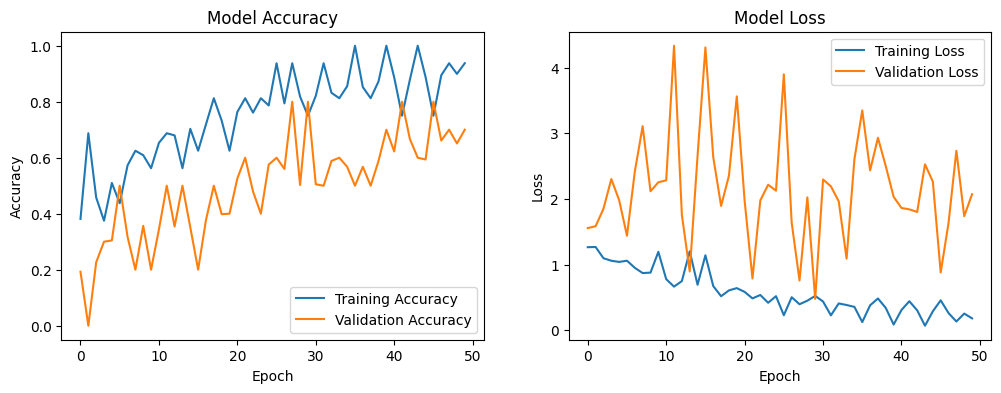

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')


plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


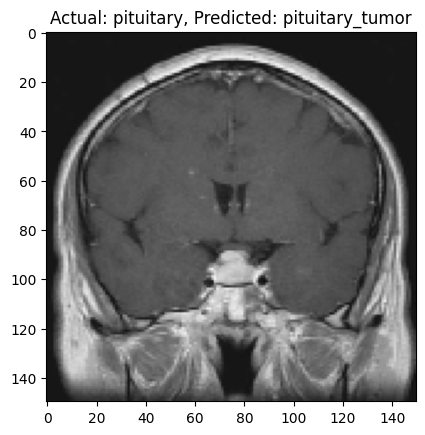

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

def display_prediction(image_path, actual_label):
    
    # Load the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the class labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the image
    plt.imshow(img)
    

    # Set title with actual and predicted labels
    if actual_label is not None:
        plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    else:
        plt.title(f'Predicted: {predicted_label}')

    plt.show()


display_prediction('D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\Brain Tumor\\brain tumour\\Testing/pituitary_tumor\\image(10).jpg', actual_label='pituitary')  